<a href="https://colab.research.google.com/github/renasmadyap/analisis_sentimen/blob/main/Analisis_Sentimen_PPKM_Mikro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df_preprocessed = pd.read_csvl("datatw.csv")
df_preprocessed = df_preprocessed.drop(columns=['user_id'])
df_preprocessed

,Text,Label
0,Aipda Aftoni selaku bhabinkamtibmas dan juga p...,positif
1,"Dengan cara pendekatan persuasif, petugas PPKM...",positif
2,@PEDOMAN_id: Provinsi Prioritas PPKM Mikro Di...,positif
3,Petugas PPKM Mikro Kelurahan Purwoyoso memberi...,positif
4,Bersama Dukung PPKM Berbasis Mikro dengan 5M.\...,positif
...,...,...
4061,Grafik positif covid 19 di PPKM Mikro Desa mas...,negatif
4062,Grafik Positif Covid-19 di PPKM Mikro Desa mas...,negatif
4063,WASPADA! Grafik positif Covid-19 di PPKM Mikro...,negatif
4064,@PadliSugianto: Grafik Positif Covid-19 di PP...,negatif


In [ ]:
Label = []
for index, row in df_preprocessed.iterrows():
    if row["Label"] == "positif":
        Label.append(1)
    else:
        Label.append(0)

df_preprocessed["Label"] = Label
df_preprocessed

,Text,Label
0,Aipda Aftoni selaku bhabinkamtibmas dan juga p...,1
1,"Dengan cara pendekatan persuasif, petugas PPKM...",1
2,@PEDOMAN_id: Provinsi Prioritas PPKM Mikro Di...,1
3,Petugas PPKM Mikro Kelurahan Purwoyoso memberi...,1
4,Bersama Dukung PPKM Berbasis Mikro dengan 5M.\...,1
...,...,...
4061,Grafik positif covid 19 di PPKM Mikro Desa mas...,0
4062,Grafik Positif Covid-19 di PPKM Mikro Desa mas...,0
4063,WASPADA! Grafik positif Covid-19 di PPKM Mikro...,0
4064,@PadliSugianto: Grafik Positif Covid-19 di PP...,0


In [ ]:
import string, re

def cleansing(data):
    # remove link
    data = re.sub(r'https?:\/\/\S+',r'', data)

    # removed @mentions  
    data = re.sub(r'@[A-Za-z0-9]+',r'', data)

    #removing RT
    data = re.sub(r'RT[\s]+',r'', data)

    # remove number
    data = re.sub(r'[0-9]+',r'', data)
    
    # remove punctuation
    remove = string.punctuation
    translator = str.maketrans(remove, ' '*len(remove))
    data = data.translate(translator)
    
    # remove newline
    data = data.replace('\n', ' ')

    # remove space
    data = data.replace('[\s]+','')

    return data


In [ ]:
#cleansing
tweet = []
for index, row in df_preprocessed.iterrows():
    tweet.append(cleansing(row["Text"]))
    
df_preprocessed["Text"] = tweet
df_preprocessed.head()

,Text,Label
0,Aipda Aftoni selaku bhabinkamtibmas dan juga p...,1
1,Dengan cara pendekatan persuasif petugas PPKM...,1
2,id Provinsi Prioritas PPKM Mikro Diminta Se...,1
3,Petugas PPKM Mikro Kelurahan Purwoyoso memberi...,1
4,Bersama Dukung PPKM Berbasis Mikro dengan M ...,1


In [ ]:
#casefolding
df_preprocessed["Text"] = df_preprocessed["Text"].astype(str).str.lower()
df_preprocessed.head()

,Text,Label
0,aipda aftoni selaku bhabinkamtibmas dan juga p...,1
1,dengan cara pendekatan persuasif petugas ppkm...,1
2,id provinsi prioritas ppkm mikro diminta se...,1
3,petugas ppkm mikro kelurahan purwoyoso memberi...,1
4,bersama dukung ppkm berbasis mikro dengan m ...,1


In [ ]:
import nltk 

In [ ]:
#tokenizing import
from nltk.tokenize import TweetTokenizer

In [ ]:
 def tokenizing(data):
  tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
  data = tokenizer.tokenize(data)

  return data

In [ ]:
#tokenizing
tweet = []
for index, row in df_preprocessed.iterrows():
    tweet.append(tokenizing(row["Text"]))
    
df_preprocessed["Text"] = tweet
df_preprocessed.head()

,Text,Label
0,"[aipda, aftoni, selaku, bhabinkamtibmas, dan, ...",1
1,"[dengan, cara, pendekatan, persuasif, petugas,...",1
2,"[id, provinsi, prioritas, ppkm, mikro, diminta...",1
3,"[petugas, ppkm, mikro, kelurahan, purwoyoso, m...",1
4,"[bersama, dukung, ppkm, berbasis, mikro, denga...",1


In [ ]:
def hapus_tandabaca(data):
  data=' '.join([char for char in data if char not in string.punctuation])
  return data

tweet = []
for index, row in df_preprocessed.iterrows():
    tweet.append(hapus_tandabaca(row["Text"]))

df_preprocessed["Text"]= tweet
df_preprocessed.head()

,Text,Label
0,aipda aftoni selaku bhabinkamtibmas dan juga p...,1
1,dengan cara pendekatan persuasif petugas ppkm ...,1
2,id provinsi prioritas ppkm mikro diminta seriu...,1
3,petugas ppkm mikro kelurahan purwoyoso memberi...,1
4,bersama dukung ppkm berbasis mikro dengan m me...,1


In [ ]:
pip install PySastrawi 

     |████████████████████████████████| 210 kB 5.2 MB/s 


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# import library stopword
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

tweet = []
for index, row in df_preprocessed.iterrows():
    tweet.append(stopword.remove(row["Text"]))
    
df_preprocessed["Text"] = tweet
df_preprocessed.head()

,Text,Label
0,aipda aftoni bhabinkamtibmas petugas ppkm mikr...,1
1,pendekatan persuasif petugas ppkm mikro mengaj...,1
2,id provinsi prioritas ppkm mikro serius pemben...,1
3,petugas ppkm mikro kelurahan purwoyoso edukasi...,1
4,dukung ppkm berbasis mikro mencuci tangan mema...,1


In [ ]:
stopwords = factory.get_stop_words()
print(stopwords)

['a', 'ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'arti', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'b', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagainamakah', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasannya', 'bahwasanya', 'baik', 'baiklah', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumla

In [ ]:
# stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

tweet = []
for index, row in df_preprocessed.iterrows():
    tweet.append(stemmer.stem(row["Text"]))
    
df_preprocessed["Text"] = tweet
df_preprocessed.head()

,Text,Label
0,aipda aftoni bhabinkamtibmas tugas ppkm mikro ...,1
1,dekat persuasif tugas ppkm mikro ajak masyarak...,1
2,id provinsi prioritas ppkm mikro serius bentuk...,1
3,tugas ppkm mikro lurah purwoyoso edukasi proto...,1
4,dukung ppkm bas mikro cuci tangan pakai masker...,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_preprocessed['Text'], df_preprocessed['Label'], 
                                                    test_size=0.3, stratify=df_preprocessed['Label'], random_state=30)
X_train, X_test, y_train, y_test

(2804    gubernur keluar surat edar kab kota sumsel lak...
 1482    ka jawat aman kap kasihan bpk drs petrus santo...
 1311      ppkm mikro kabupaten bogor positif sembuh aktif
 3447    gusmenteri grafik positif covid ppkm mikro des...
 3560    giat tengah laku ppkm skala mikro haramain gus...
                               ...                        
 1594    tugas ppkm mikro polsek gayamsari himbauan dag...
 2448    efektif ppkm mikro tuk halau sebar covid haramain
 942     bhabinkamtibmas desa tambak ukir polsek kendit...
 874     laksana himbauan sosialisasi protokol sehat pp...
 606        patroli posko ppkm mikro kel wonorejo surabaya
 Name: Text, Length: 2846, dtype: object,
 2522    polrres pematangsiantar laksana operasi yustis...
 3133    kspk ipda supandi pimpin operasi yustisi tni p...
 1656    protokol sehat cegah sebar virus covid edukasi...
 1290    babinsa koramil tellu siatting serda muh asdar...
 3706    polres kebumen polsek jajar rutin gelar operas...
              

In [ ]:
data_testing = X_test.copy()
f_test = df_preprocessed['Text']
f_test

0       aipda aftoni bhabinkamtibmas tugas ppkm mikro ...
1       dekat persuasif tugas ppkm mikro ajak masyarak...
2       id provinsi prioritas ppkm mikro serius bentuk...
3       tugas ppkm mikro lurah purwoyoso edukasi proto...
4       dukung ppkm bas mikro cuci tangan pakai masker...
                              ...                        
4061    grafik positif covid ppkm mikro desa slalu ste...
4062    grafik positif covid ppkm mikro desa libur was...
4063    waspada grafik positif covid ppkm mikro jaga p...
4064           grafik positif covid ppkm mikro desa libur
4065    grafik positif covid ppkm mikro desa libur har...
Name: Text, Length: 4066, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

#tfidf
x_train = vectorizer.fit_transform(X_train)
x_test = vectorizer.transform(X_test)
f_test = vectorizer.transform(f_test)

print(x_train.shape)
print(x_test.shape)
print(f_test.shape)
print(x_train)

(2846, 3625)
(1220, 3625)
(4066, 3625)
  (0, 1870)	0.058772674052201754
  (0, 2781)	0.3565982761355653
  (0, 2433)	0.05875203042496681
  (0, 1607)	0.18808155619493622
  (0, 3054)	0.36430151732755905
  (0, 1535)	0.21794016871704716
  (0, 1256)	0.21633313957436345
  (0, 737)	0.3965849774531933
  (0, 3080)	0.3965849774531933
  (0, 1411)	0.42369883619480736
  (0, 889)	0.3308525909835373
  (1, 227)	0.18457289418015083
  (1, 1275)	0.18457289418015083
  (1, 772)	0.1755135780184878
  (1, 1033)	0.1755135780184878
  (1, 2569)	0.23757045377502703
  (1, 2547)	0.12193734922732231
  (1, 1024)	0.1381118843692938
  (1, 244)	0.146483668659271
  (1, 476)	0.1320360631597291
  (1, 2948)	0.07965174483261839
  (1, 1606)	0.09674749379546904
  (1, 3067)	0.18457289418015083
  (1, 2193)	0.1509672585865391
  (1, 2899)	0.18457289418015083
  :	:
  (2843, 646)	0.16048419968353625
  (2843, 575)	0.0694303131442663
  (2843, 1606)	0.08136778041290176
  (2844, 686)	0.4282171254163579
  (2844, 3427)	0.4780330209577351
  

In [ ]:
print(vectorizer.get_feature_names())

['abah', 'abai', 'abdul', 'abdullah', 'abdulyani', 'abg', 'absis', 'abu', 'acara', 'aceh', 'acehtpp', 'achmad', 'acip', 'acn', 'acu', 'ad', 'ada', 'adakan', 'adalagi', 'adang', 'adaptasi', 'adaptasikebiasaanbaru', 'adat', 'add', 'addakhil', 'adi', 'afif', 'afriendra', 'agam', 'agama', 'agung', 'agus', 'ah', 'ahli', 'ahmad', 'ahri', 'aipda', 'aiptu', 'air', 'airlangga', 'airlanggahartarto', 'aja', 'ajak', 'ajar', 'aje', 'akasia', 'akbar', 'akbp', 'akbphandonosubiakto', 'akibat', 'akp', 'aktif', 'aktifitas', 'aktivitas', 'al', 'alai', 'alam', 'alang', 'alani', 'alat', 'aleh', 'alfamart', 'alfian', 'alhamdulilah', 'alhamdulillah', 'ali', 'alir', 'alkhamdulilah', 'alun', 'amal', 'aman', 'amanah', 'amandirumah', 'amanggaran', 'ambarita', 'ambil', 'ambune', 'amd', 'amongrogo', 'ampe', 'ampuh', 'an', 'anak', 'anam', 'anang', 'ancam', 'andayani', 'andi', 'andik', 'andiyan', 'andonosari', 'andreas', 'angela', 'anggit', 'anggota', 'angka', 'angkat', 'angkring', 'anies', 'anim', 'anjur', 'ano', '

In [ ]:
X_train = X_train .to_excel("/content/training.xlsx")

In [ ]:
# import csv

# with open('/content/term.csv', "w") as f:
#     writer = csv.writer(f)
#     for row in term:
#         writer.writerow(row)

In [ ]:
print(y_train)

2804    1
1482    1
1311    0
3447    0
3560    1
       ..
1594    1
2448    1
942     1
874     1
606     1
Name: Label, Length: 2846, dtype: int64


In [ ]:
#svm
from sklearn import svm
import sys
import numpy

clf = svm.SVC(kernel="linear")
clf.fit(x_train,y_train)
predict = clf.predict(x_test)
f_pred_test = clf.predict(f_test)
numpy.set_printoptions(threshold=sys.maxsize)
print(predict)
len(predict)

[1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1
 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

1220

In [ ]:
df_datatesting = pd.DataFrame(data_testing)
df_Labeltesting = pd.DataFrame(predict)

Label = []
for index, row in df_Labeltesting.iterrows():
    if row[0] == 1:
        Label.append("positif")
    else:
        Label.append("negatif")

df_Labeltesting["Label"] = Label
df_Labeltesting = df_Labeltesting.drop(columns=[0])
df_Labeltesting.head()

,Label
0,positif
1,positif
2,positif
3,positif
4,positif


In [ ]:
pip install XlsxWriter

     |████████████████████████████████| 149 kB 4.8 MB/s 


In [ ]:
#save data testing
writer = pd.ExcelWriter('hasildatatesting.xlsx', engine='xlsxwriter')   
df_datatesting.to_excel(writer,sheet_name='hasilklasifikasi',startrow=0 , startcol=0)   
df_Labeltesting.to_excel(writer,sheet_name='hasilklasifikasi',startrow=0, startcol=2) 
writer.save()

dft = pd.read_excel("/content/hasildatatesting.xlsx")
dft = dft.drop(columns=['Unnamed: 0', 'Unnamed: 2'])
dft

,Text,Label
0,polrres pematangsiantar laksana operasi yustis...,positif
1,kspk ipda supandi pimpin operasi yustisi tni p...,positif
2,protokol sehat cegah sebar virus covid edukasi...,positif
3,babinsa koramil tellu siatting serda muh asdar...,positif
4,polres kebumen polsek jajar rutin gelar operas...,positif
...,...,...
1215,kapolda jatim tinjau laksana ppkm mikro dusun ...,positif
1216,giat laksana ppkm skala mikro wilayah kodim pr...,positif
1217,darnramil rambipuji kapten chb mulyadi konfirm...,positif
1218,giat ops yustisi tega disiplin patuh protokol ...,positif


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, x_train, y_train, cv=10)
scores= list(map('{:.2%}'.format,scores))
print(f'{scores}')
print(f"{cross_val_score(clf, x_train, y_train, cv=10).mean():.2%}")

['97.54%', '95.79%', '97.89%', '95.79%', '95.79%', '96.84%', '96.48%', '96.48%', '95.42%', '96.13%']
96.42%


In [ ]:
# import library evaluation
from sklearn.metrics import recall_score, precision_score, confusion_matrix, accuracy_score

In [ ]:
# confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predict).ravel()

In [ ]:
# tn
print("Hasil True Negative adalah: ")
print(tn)

# fp
print("Hasil False Positive adalah: ")
print(fp)

# fn
print("Hasil False Negative adalah: ")
print(fn)

# tp
print("Hasil True Positive adalah: ")
print(tp)

Hasil True Negative adalah: 
135
Hasil False Positive adalah: 
26
Hasil False Negative adalah: 
9
Hasil True Positive adalah: 
1050


In [ ]:
# accuracy score
print("accuracy score hasil prediksi adalah: ")
print(f"{accuracy_score(y_test, predict):.2%}")

# precision score
print("precision score hasil prediksi adalah: ")
print(f"{precision_score(y_test, predict):.2%}")

# recall score
print("recall score hasil prediksi adalah: ")
print(f"{recall_score(y_test, predict):.2%}")

accuracy score hasil prediksi adalah: 
97.13%
precision score hasil prediksi adalah: 
97.58%
recall score hasil prediksi adalah: 
99.15%


In [ ]:
df_datafull = df_preprocessed['Text']
df_Labelfull = pd.DataFrame(f_pred_test)
df_Labelfull["Label"] = df_Labelfull
df_Labelfull = df_Labelfull.drop(columns=[0])

In [ ]:
#full data
writer = pd.ExcelWriter('datatweet.xlsx', engine='xlsxwriter')   
df_datafull.to_excel(writer,sheet_name='datafull',startrow=0 , startcol=0)
df_Labelfull.to_excel(writer,sheet_name='datafull',startrow=0 , startcol=2)
writer.save()

dft = pd.read_excel("/content/datatweet.xlsx")
dft = dft.drop(columns=['Unnamed: 0', 'Unnamed: 2'])
dft["Text"] = dft["Text"].astype(str)

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

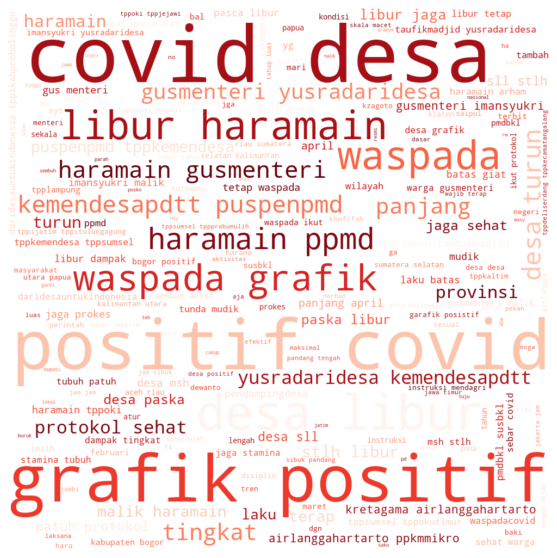

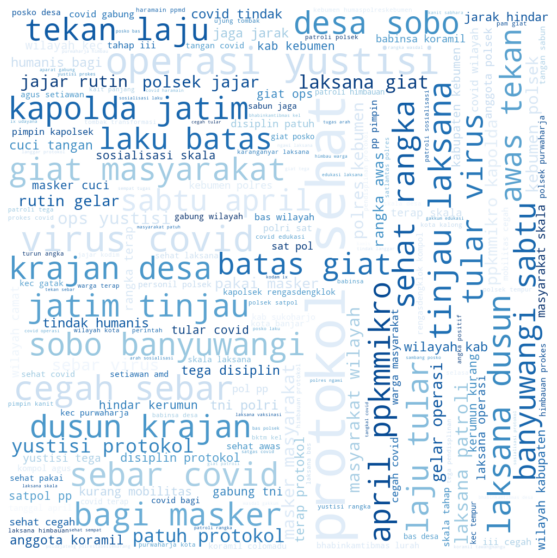

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#negative
train_s0 = dft[dft["Label"] == 0]
all_text_s0 = ' '.join(word for word in train_s0["Text"])
stop_words = ["ppkm", "mikro"] 
wordcloud = WordCloud(stopwords= stop_words, colormap='Reds',
                      width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

#positive
train_s1 = dft[dft["Label"] == 1]
all_text_s1 = ' '.join(word for word in train_s1["Text"])
stop_words = ["ppkm", "mikro"] 
wordcloud = WordCloud(stopwords= stop_words, colormap='Blues',
                      width=1000, height=1000, background_color='white', mode='RGBA').generate(all_text_s1)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
dft_diagram = dft.copy()
Label = []
for index, row in dft_diagram.iterrows():
    if row["Label"] == 1:
        Label.append("positif")
    else:
        Label.append("negatif")

dft_diagram["Label"] = Label

In [ ]:
# from collections import Counter
# print(Counter(dft_diagram['Label']))

In [ ]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

In [ ]:
title_type = dft_diagram.groupby('Label').agg('count')
print(title_type)

         Text
Label        
negatif   491
positif  3575


In [ ]:
plt.figure(1, figsize=(10,10)) 
the_grid = GridSpec(2, 2)

<Figure size 720x720 with 0 Axes>

In [ ]:
type_labels = title_type.Text.sort_values().index 
type_counts = title_type.Text.sort_values()

In [ ]:
cmap = plt.get_cmap('Spectral')
cl = ['tomato','lightskyblue']

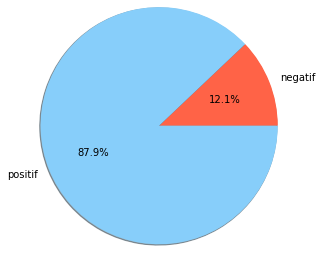

In [ ]:
plt.subplot(the_grid[1, 1], aspect=1)
type_show_ids = plt.pie(type_counts, labels=type_labels, autopct='%2.1f%%', shadow=True, colors=cl, radius=3)
plt.show()